#Missing Value & Outlier (결측치와 이상치)

Data 측정과 처리시 여러가지 상황이 발생하며 그로 인해 데이터의 노이즈나 결속이 나타난다. 이를 보정하는 작업이 필요하다.



*   결측치 : 데이터 측정이 안된 경우, 특이한 값으로 표기됨
      - 측정 feature vector를 제거
      - 결측치가 많은 feature를 제거
      - 보관법/최빈수/평균 등 적절한 데이터를 임의로 배정
*   이상치 : 데이터가 오염된 경우, 정상 범위가 있다면 정상 범위를 벗어난 값
      - 측정 feature vector를 제거
      - 이상치가 많은 feature를 제거
      - 이상치를 정상범위의 최대/최소 값으로 대치
*   정삼 범위의 판단
      - 정규분포 시그마(분산)의 활용
*   항목 추가





In [51]:
import pandas as pd
import numpy as np

In [52]:
import pandas as pd

# Series 형태는 값과 해당하는 index
data = pd.Series([10, 90, 83], index=['Quiz', 'Midterm', 'Final'])

In [53]:
# DataFrame은 여러 값들과, 이에 해당하는 columns
# 각 columns에 해당하는 값들을 라인별로 입력하는 형식
data = pd.DataFrame([[10, 90, 83], [15, 85, 90], [20, 100, 93], [10, 88, 86], [15, 95, 90]], columns=['Quiz', 'Midterm', 'Final'])
print(data)

   Quiz  Midterm  Final
0    10       90     83
1    15       85     90
2    20      100     93
3    10       88     86
4    15       95     90


In [54]:
# DataFrame을 표현하는 다른 방식
# 각 columns와 columns가 포함하는 값을 저장하는 방식
data = pd.DataFrame({'Quiz': [10,15,20,10,15],
                     'Midterm': [90,85,100,88,95],
                     'Final': [83,90,93,86,90]})
data

,Quiz,Midterm,Final
0,10,90,83
1,15,85,90
2,20,100,93
3,10,88,86
4,15,95,90


In [55]:
# 처음부터 Array 형태로 만들고
dataArray = [[10,90,83],
             [15,85,90],
             [20,100,93],
             [10,88,86],
             [15,95,90]]

# Arrary에 columns만 추가하여 DataFrame으로 변형
data = pd.DataFrame(dataArray, columns=['Quiz', 'Midterm', 'Final'])
print(data)

   Quiz  Midterm  Final
0    10       90     83
1    15       85     90
2    20      100     93
3    10       88     86
4    15       95     90


In [56]:
students = list([[101, '허준호', '남자', 30, 183],
                 [102, '이가원', '여자', 24, 162],
                 [103, '배규민', '남자', 23, 179],
                 [104, '고고림', '남자', 21, 182],
                 [105, '이새봄', '여자', 28, 160],
                 [106, '이보람', '여자', 26, 163],
                 [107, '이루리', '여자', 24, 157],
                 [108, '오다현', '여자', 24, 172]])

# Array와 같이 list도 DataFrame으로 변형 가능
data = pd.DataFrame(students, columns=['번호', '이름', '성별', '나이', '키'])
print(data)

print("Data at raw 3")
print(data.iloc[2]) # 3번째 raw의 데이터

dataID = data.set_index('번호') # set_index를 통해 '번호' columns의 값을 대표 index로 지정, dataID에 할당
print(dataID)
print("Data 번호 = 104")
print(dataID.loc[104]) # dataID는 data의 '번호' 열 , 번호 열에서 "104"의 값을 가지는 행을 가져옴
data.columns

    번호   이름  성별  나이    키
0  101  허준호  남자  30  183
1  102  이가원  여자  24  162
2  103  배규민  남자  23  179
3  104  고고림  남자  21  182
4  105  이새봄  여자  28  160
5  106  이보람  여자  26  163
6  107  이루리  여자  24  157
7  108  오다현  여자  24  172
Data at raw 3
번호    103
이름    배규민
성별     남자
나이     23
키     179
Name: 2, dtype: object
      이름  성별  나이    키
번호                   
101  허준호  남자  30  183
102  이가원  여자  24  162
103  배규민  남자  23  179
104  고고림  남자  21  182
105  이새봄  여자  28  160
106  이보람  여자  26  163
107  이루리  여자  24  157
108  오다현  여자  24  172
Data 번호 = 104
이름    고고림
성별     남자
나이     21
키     182
Name: 104, dtype: object


Index(['번호', '이름', '성별', '나이', '키'], dtype='object')

In [57]:
print(data.describe()) # DataFrame 정보 출력
print(data.head(3)) # 가장 위 데이터 3개 뽑기
print(data.tail(2)) # 가장 아래 데이터 2개 뽑기

              번호         나이           키
count    8.00000   8.000000    8.000000
mean   104.50000  25.000000  169.750000
std      2.44949   2.878492   10.552589
min    101.00000  21.000000  157.000000
25%    102.75000  23.750000  161.500000
50%    104.50000  24.000000  167.500000
75%    106.25000  26.500000  179.750000
max    108.00000  30.000000  183.000000
    번호   이름  성별  나이    키
0  101  허준호  남자  30  183
1  102  이가원  여자  24  162
2  103  배규민  남자  23  179
    번호   이름  성별  나이    키
6  107  이루리  여자  24  157
7  108  오다현  여자  24  172


In [58]:
# data['키'] > 180  # 각 데이터에서 키가 180 이상인지에 대한 True False값으로 반환
# data[data['키'] > 180] # 각 데이터에서 키 > 180인 사람의 데이터 출력

data[(data['키'] > 180) & (data['나이'] > 25)] # 키 > 180 이고 나이 > 25인 데이터

,번호,이름,성별,나이,키
0,101,허준호,남자,30,183


In [59]:
mean_by_gender = data.groupby(by=['성별'], as_index=False)['키'].mean() # mean = 평균값
# '성별' index에 대해 group 분할, ['키']의 값을 평균값으로 변경
mean_by_gender.rename(columns={'키':'평균 키'}, inplace=True)
# columns의 '키'를 '평균 키'로 변경, inplace=True -> 데이터 내부 값 변경

std_by_gender = data.groupby(by=['성별'], as_index=False)['키'].std() # std = 표준편차
# '성별'로 group 분할, '키'의 값을 std(표준편차) 값으로 변경
std_by_gender.rename(columns={'키': '키의 표준편차'}, inplace=True)
# '키' columns -> '키의 표준편차' 로 변경

# 평균 키와 키 표준편차로 나눴던 데이터 합산 (merge)
data = pd.merge(mean_by_gender, std_by_gender)
data

,성별,평균 키,키의 표준편차
0,남자,181.333333,2.081666
1,여자,162.800000,5.630275


# 결측치와 이상치 실습

In [61]:
# nan 값을 넣어서 DataFrame 생성
data = pd.DataFrame({'Quiz':[10,15,20,np.nan,15],
                     'Midterm':[90,np.nan,100,88,95],
                     'Final': [83,90,93,np.nan,90]})

#data
print(data.iloc[0])

Quiz       10.0
Midterm    90.0
Final      83.0
Name: 0, dtype: float64


In [62]:
# isna -> 데이터에서 nan값인지 확인
pd.isna(data)

,Quiz,Midterm,Final
0,False,False,False
1,False,True,False
2,False,False,False
3,True,False,True
4,False,False,False


In [63]:
# nan 값을 가진 데이터 drop 하기(버리기)
data.dropna()

#data.dropna(subset=['Midterm'])

,Quiz,Midterm,Final
0,10.0,90.0,83.0
2,20.0,100.0,93.0
4,15.0,95.0,90.0


In [64]:
data.fillna(data.mean()) # ,inplace=True) #mean = 평균, 즉 nan 데이터를 평균으로 채워라
# inplace=True, 지금 사용하는 원본 data를 변경 ok

,Quiz,Midterm,Final
0,10.0,90.00,83.0
1,15.0,93.25,90.0
2,20.0,100.00,93.0
3,15.0,88.00,89.0
4,15.0,95.00,90.0


In [65]:
# 성적 반영 비율 Quiz : 30%, Midterm : 30%, Final : 40% 라고 할 때
data = pd.DataFrame({'Quiz':[8,10,10,np.nan,6],
                     'Midterm':[93,90,100,88,95],
                     'Final': [90,90,93,np.nan,90]})

data.dropna(inplace=True) # 결측치 nan값 포함자는 drop하고, inplace=True로 데이터 변경
print(data)

# 성적 반영 비율에 맞추어 점수 계산한 것을 result에 저장
result = data['Quiz']*0.3 + data['Midterm']*0.3 + data['Final']*0.4

# 값을 sort 해서 출력
print(result.sort_values())

   Quiz  Midterm  Final
0   8.0       93   90.0
1  10.0       90   90.0
2  10.0      100   93.0
4   6.0       95   90.0
1    66.0
0    66.3
4    66.3
2    70.2
dtype: float64


abalone.csv revisit

In [66]:
from google.colab import drive
drive.mount('/content/drive')
# '/content/drive/MyDrive/Colab Notebooks/DataMining/File' 위치에 abalone.txt 파일을 두어야한다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# abalone.txt 파일에 존재하는 columns를 가져와 설정
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/File/abalone.txt', names=['Sex',
                                           'Length',
                                           'Diameter',
                                           'Height',
                                           'Whole weight',
                                           'Shucked weight',
                                           'Viscera weight',
                                           'Shell weight',
                                           'Rings'], header=None)
print(data.shape) # 데이터 구조 출력
data
# data.describe()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Standardization & Normalization (표준화와 정규화)

In [68]:
import matplotlib.pyplot as plt

<Axes: >

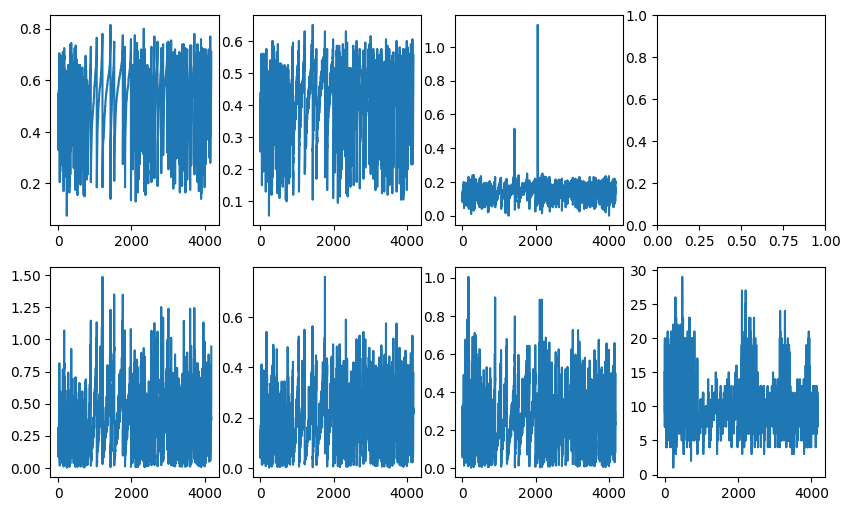

In [69]:
# abalone.txt 데이터값을 그래프로 그려 분포를 알아보기
# 각각의 columns 값들을 가져와 출력

plt.figure(1, figsize=(10,6))
plt.subplot(2, 4, 1)
data['Length'].plot()
plt.subplot(2, 4, 2)
data['Diameter'].plot()
plt.subplot(2, 4, 3)
data['Height'].plot()
plt.subplot(2, 4, 4)
data['Whole weight'].plot
plt.subplot(2, 4, 5)
data['Shucked weight'].plot()
plt.subplot(2, 4, 6)
data['Viscera weight'].plot()
plt.subplot(2, 4, 7)
data['Shell weight'].plot()
plt.subplot(2, 4, 8)
data['Rings'].plot()

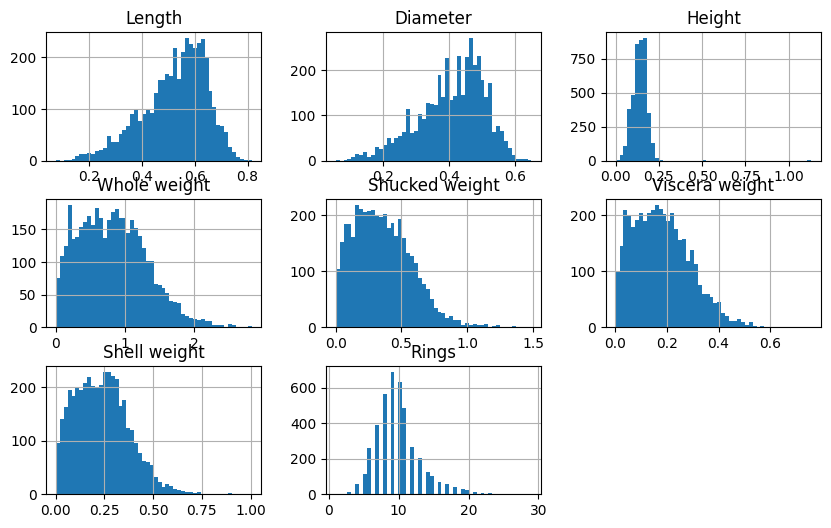

In [70]:
data.hist(bins=50, figsize=(10, 6)) #bins = 가로축 구간 개수
plt.show()

<Axes: >

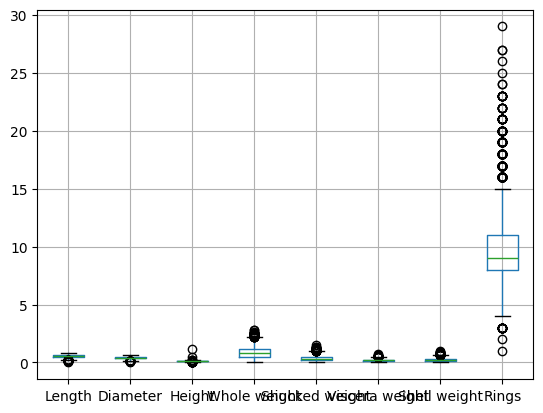

In [71]:
data.boxplot() # box형태로 그래프 그리기

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7e7a3674ac50>, <matplotlib.lines.Line2D object at 0x7e7a3674b410>], 'caps': [<matplotlib.lines.Line2D object at 0x7e7a3674a1d0>, <matplotlib.lines.Line2D object at 0x7e7a3673c9d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7e7a36749dd0>], 'medians': [<matplotlib.lines.Line2D object at 0x7e7a3673d4d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7e7a3673e050>], 'means': []})

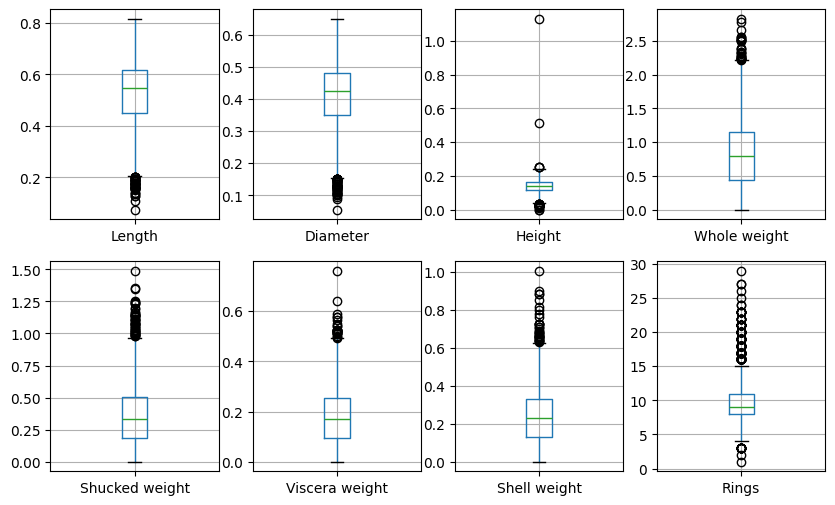

In [72]:
# boxplot 형태로 각 columns 데이터 출력

plt.figure(1, figsize=(10,6))
plt.subplot(2, 4, 1)
data.boxplot(column='Length', return_type='both')
plt.subplot(2, 4, 2)
data.boxplot(column='Diameter', return_type='both')
plt.subplot(2, 4, 3)
data.boxplot(column='Height', return_type='both')
plt.subplot(2, 4, 4)
data.boxplot(column='Whole weight', return_type='both')
plt.subplot(2, 4, 5)
data.boxplot(column='Shucked weight', return_type='both')
plt.subplot(2, 4, 6)
data.boxplot(column='Viscera weight', return_type='both')
plt.subplot(2, 4, 7)
data.boxplot(column='Shell weight', return_type='both')
plt.subplot(2, 4, 8)
data.boxplot(column='Rings', return_type='both')

In [73]:
# 해당 feature vector의 위치
# Height 값을 보니 대부분 0.3 아래에 있음.
data['Height'] > 0.3

,Height
0,False
1,False
2,False
3,False
4,False
...,...
4172,False
4173,False
4174,False
4175,False


In [74]:
(data['Height'] > 0.3).sum()

np.int64(2)

In [75]:
dataRm = data[data['Height'] < 0.3] # Height가 0.3 초과인 데이터 삭제를 위해 데이터 선택
#0.3보다 작은 애들이 True로 나오니까, 0.3 초과인 데이터는 False로 나옴 => drop 하면 삭제됨

print(dataRm) #여기서는 raw 개수가 그대로 4177개
dataRm = dataRm.reset_index(drop=True) # 삭제할 데이터 drop

print(dataRm) #drop해서 0.3 이상의 데이터를 삭제하고 reset_index로 인해 raw 번호가 줄어드는 것을 확인 가능

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7e7a36678350>, <matplotlib.lines.Line2D object at 0x7e7a36678e90>], 'caps': [<matplotlib.lines.Line2D object at 0x7e7a366799d0>, <matplotlib.lines.Line2D object at 0x7e7a3667a350>], 'boxes': [<matplotlib.lines.Line2D object at 0x7e7a3666f950>], 'medians': [<matplotlib.lines.Line2D object at 0x7e7a3667af50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7e7a3667b990>], 'means': []})

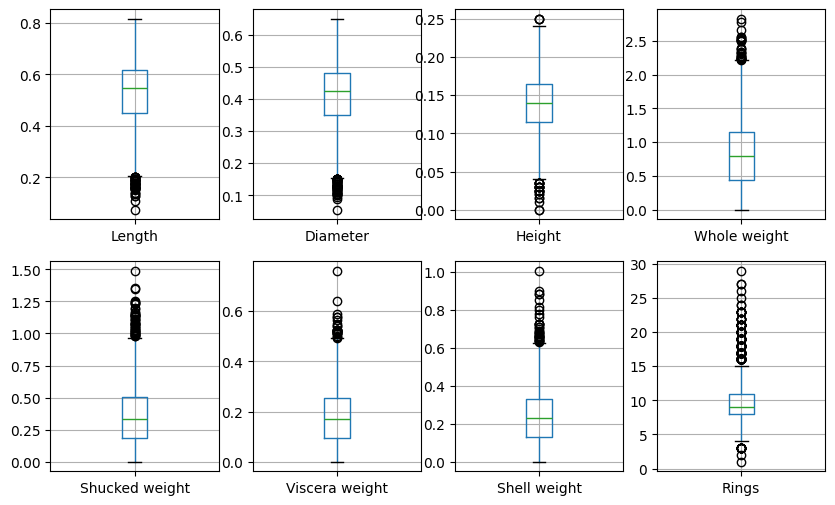

In [76]:
# Height 이상치 제거로 Height 그래프가 약간 바뀜

plt.figure(1, figsize=(10,6))
plt.subplot(2, 4, 1)
dataRm.boxplot(column='Length', return_type='both')
plt.subplot(2, 4, 2)
dataRm.boxplot(column='Diameter', return_type='both')
plt.subplot(2, 4, 3)
dataRm.boxplot(column='Height', return_type='both')
plt.subplot(2, 4, 4)
dataRm.boxplot(column='Whole weight', return_type='both')
plt.subplot(2, 4, 5)
dataRm.boxplot(column='Shucked weight', return_type='both')
plt.subplot(2, 4, 6)
dataRm.boxplot(column='Viscera weight', return_type='both')
plt.subplot(2, 4, 7)
dataRm.boxplot(column='Shell weight', return_type='both')
plt.subplot(2, 4, 8)
dataRm.boxplot(column='Rings', return_type='both')

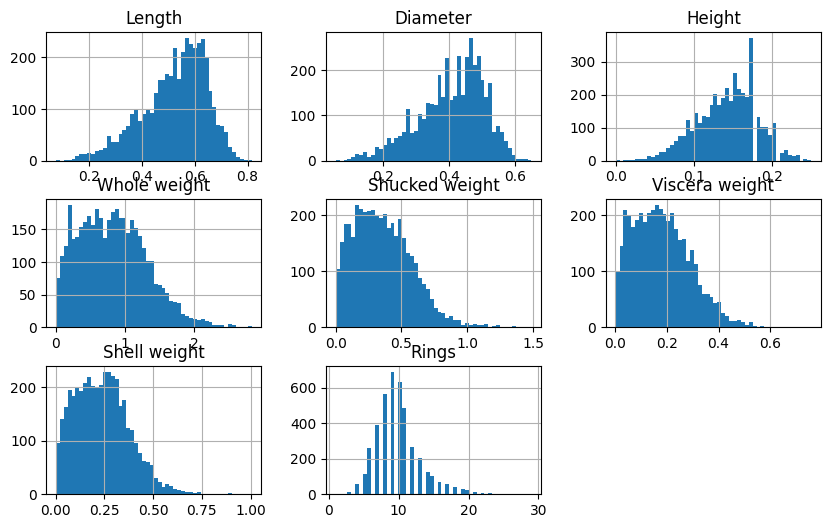

In [77]:
dataRm.hist(bins=50, figsize=(10, 6)) #bins = 가로축 구간 개수
plt.show()
# Height 이상치를 제거했기 때문에 Height 그래프 모양이 약간 바뀐 모습

In [78]:
# IQR
# 사분위수 범위로 데이터의 이상치를 제거하는 하나의 방법
# IQR = Q3 - Q1
q3Length = dataRm['Length'].quantile(q=0.75) # 0.75 -> 3분위
q1Length = dataRm['Length'].quantile(q=0.25) # 0.25 -> 1분위
iqrLength = q3Length - q1Length
print('Length IQR', iqrLength)

maxLength = q3Length + 1.5 * iqrLength # 3분위 + 1.5IQR
minLength = q1Length - 1.5 * iqrLength # 1분위 - 1.5IQR
print(minLength, '~', maxLength) # 이 값들이 정상적인 데이터 값으로 판단할 범위

print('over max', (dataRm['Length'] > maxLength).sum()) # 최대치 넘는 값 개수 출력
print('under min', (dataRm['Length'] < minLength).sum()) # 최소치 아래 값 개수 출력

Length IQR 0.16499999999999998
0.20250000000000004 ~ 0.8624999999999999
over max 0
under min 49


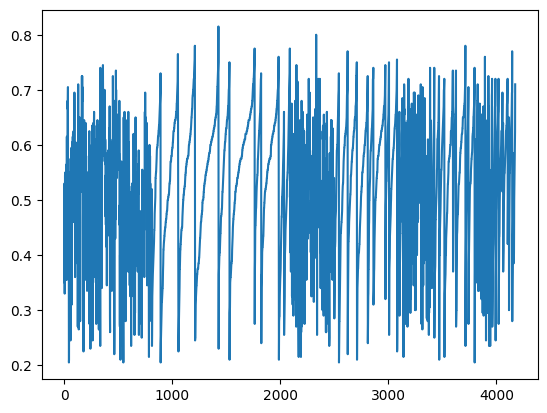

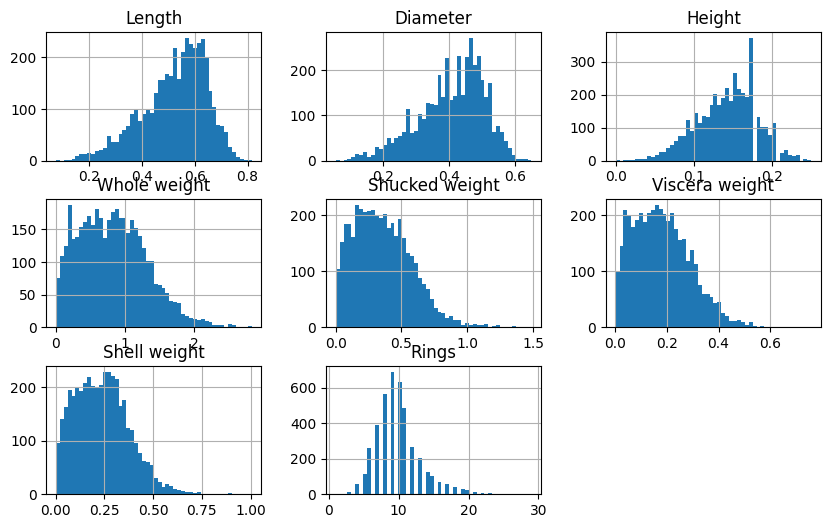

In [79]:
# IQR 기준 이상치 제거한 값을 result에 할당
result = dataRm[(minLength < dataRm['Length']) & (dataRm['Length'] < maxLength)]
result['Length'].plot()

# 그래프 그려보
dataRm.hist(bins=50, figsize=(10, 6)) #bins = 가로축 구간 개수
plt.show()

In [80]:
# z-score
# IQR처럼 이상치 판별할 때 사용하는 방법

# z-score = (데이터값 - 평균값) / 표준편차
# z-score적용한 zHeight columns 생성해서 값 할당
dataRm['zHeight'] = (dataRm['Height'] - dataRm['Height'].mean()) / dataRm['Height'].std()

print(dataRm)
print(dataRm['zHeight'])
# z-score의 최대 최소는 데이터 분류에 따라서 각자 설정
print('over max', (dataRm['zHeight'] > 3.).sum())
print('under min', (dataRm['zHeight'] < -3.).sum())

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4170   F   0.565     0.450   0.165        0.8870          0.3700   
4171   M   0.590     0.440   0.135        0.9660          0.4390   
4172   M   0.600     0.475   0.205        1.1760          0.5255   
4173   F   0.625     0.485   0.150        1.0945          0.5310   
4174   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings   zHeight  
0             0.1010        0.1500     15 -1.148095  
1             0.0485        0.0700      7 -1.278002  
2             0.1415 

<Axes: >

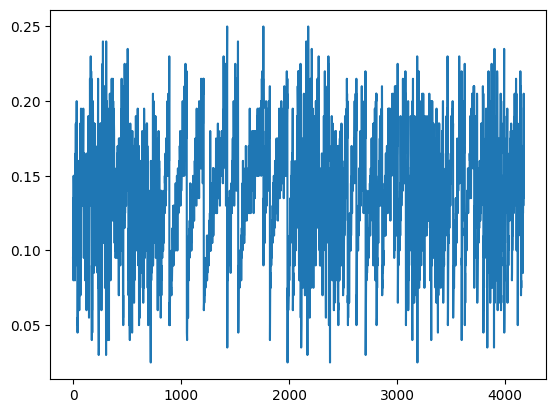

In [81]:
result = dataRm[(-3. < dataRm['zHeight']) & (dataRm['zHeight'] < 3.)]
result['Height'].plot()